In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
df = pd.read_csv('USDPHP micro_H4 _OHLC.csv', header=None)
df1 = pd.read_csv('USDPHP micro_H4_OHLC1.csv', header=None)
df1 = df1.iloc[:-15]

idx = int(df.shape[0] * 0.4)
df1.columns = ['Date', 'Open', 'High', 'Low', 'Close']
date_column=df1['Date']
date_column=pd.DataFrame(date_column)
date_test = date_column[1745:]
date_test['Date']=pd.to_datetime(date_test['Date'], dayfirst=True)
dt_sliced = date_test.tail(582)
print(len(date_test))

1162


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30244\1151765264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_test['Date']=pd.to_datetime(date_test['Date'], dayfirst=True)


In [4]:
ground = df1[1745:]
ground.info()

grOpen = ground['Open']
grHigh = ground['High']
grLow = ground['Low']
grClose = ground['Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 1745 to 2906
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1162 non-null   object 
 1   Open    1162 non-null   float64
 2   High    1162 non-null   float64
 3   Low     1162 non-null   float64
 4   Close   1162 non-null   float64
dtypes: float64(4), object(1)
memory usage: 45.5+ KB


In [5]:
FLF_RNN =  pd.read_csv('DataFLF_RNN.csv')
FLF_RNN = FLF_RNN[1745:]
FLF_RNN.drop(['Unnamed: 0'], axis=1, inplace=True)
FLF_RNN.info()

rnnOpen = FLF_RNN['Open']
rnnHigh = FLF_RNN['High']
rnnLow = FLF_RNN['Low']
rnnClose = FLF_RNN['Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 1745 to 2906
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1162 non-null   float64
 1   High    1162 non-null   float64
 2   Low     1162 non-null   float64
 3   Close   1162 non-null   float64
dtypes: float64(4)
memory usage: 36.4 KB


In [6]:
OHLC_LSTM =  pd.read_csv('DataOHLC_LSTM.csv')
OHLC_LSTM = OHLC_LSTM[1750:]
OHLC_LSTM.drop(['Unnamed: 0'], axis=1, inplace=True)
OHLC_LSTM.columns = ['Open', 'High', 'Low', 'Close']
OHLC_LSTM.info()

OHLCOpen = OHLC_LSTM['Open']
OHLCHigh = OHLC_LSTM['High']
OHLCLow = OHLC_LSTM['Low']
OHLCClose = OHLC_LSTM['Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 1750 to 2911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1162 non-null   float64
 1   High    1162 non-null   float64
 2   Low     1162 non-null   float64
 3   Close   1162 non-null   float64
dtypes: float64(4)
memory usage: 36.4 KB


In [7]:
FLF_LSTM =  pd.read_csv('DataFLF_LSTM.csv')
FLF_LSTM = FLF_LSTM[1750:]
FLF_LSTM.drop(['Unnamed: 0'], axis=1, inplace=True)
FLF_LSTM.columns = ['Open', 'High', 'Low', 'Close']
FLF_LSTM.info()

FLFOpen = FLF_LSTM['Open']
FLFHigh = FLF_LSTM['High']
FLFLow = FLF_LSTM['Low']
FLFClose = FLF_LSTM['Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 1750 to 2911
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1162 non-null   float64
 1   High    1162 non-null   float64
 2   Low     1162 non-null   float64
 3   Close   1162 non-null   float64
dtypes: float64(4)
memory usage: 36.4 KB


In [8]:
ARIMA = pd.read_csv('ARIMA.csv')
ARIMA = ARIMA[:idx]
ARIMA = ARIMA.iloc[3:]
ARIMA.info()

ARIMAOpen = ARIMA['Open']
ARIMAHigh = ARIMA['High']
ARIMALow = ARIMA['Low']
ARIMAClose = ARIMA['Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 3 to 584
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    582 non-null    float64
 1   High    582 non-null    float64
 2   Low     582 non-null    float64
 3   Close   582 non-null    float64
dtypes: float64(4)
memory usage: 18.3 KB


In [9]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

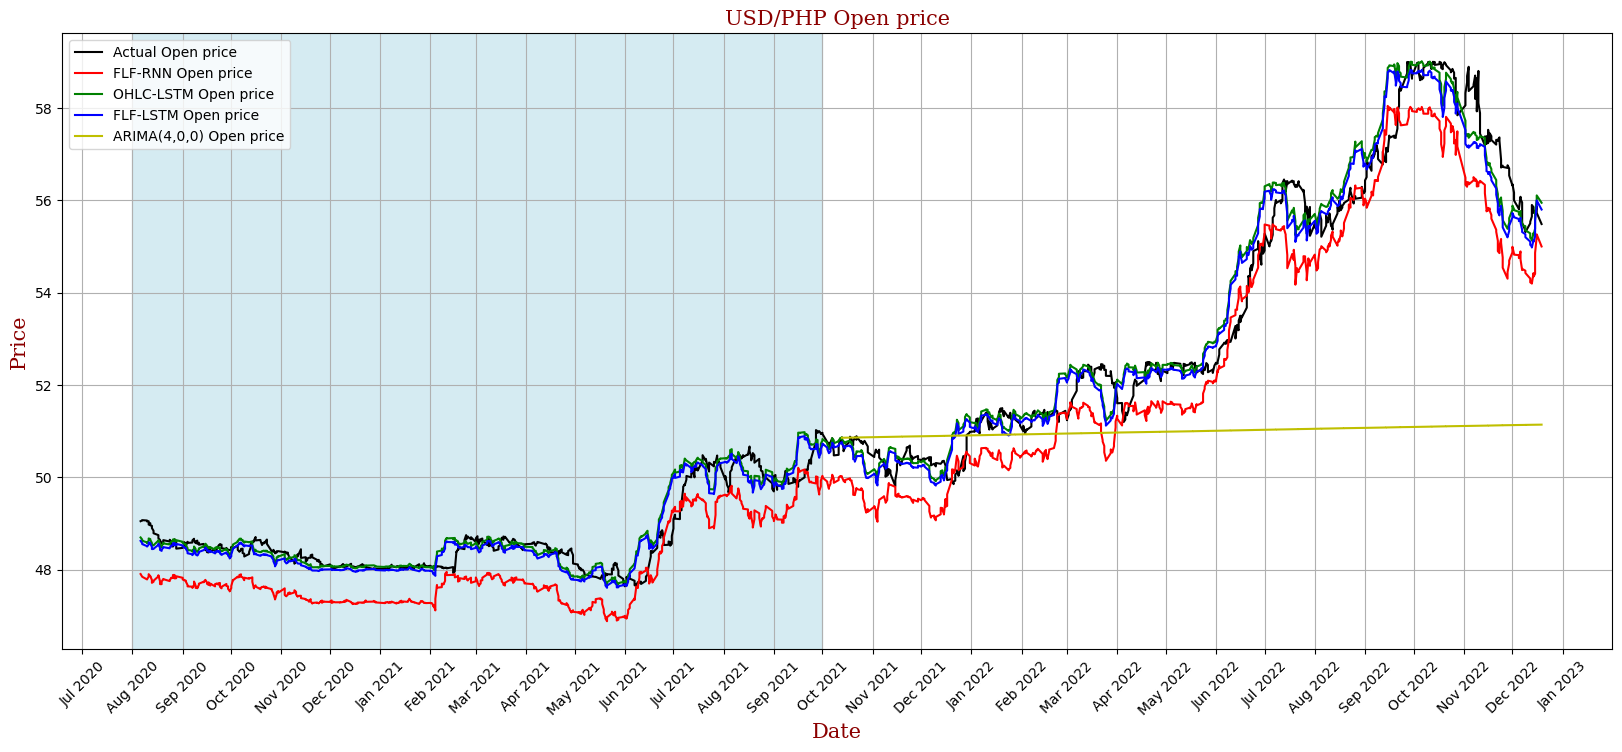

In [11]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,8))
plt.plot(date_test, grOpen, 'k', label='Actual Open price')
plt.plot(date_test, rnnOpen, 'r', label='FLF-RNN Open price')
plt.plot(date_test, OHLCOpen, 'g', label='OHLC-LSTM Open price')
plt.plot(date_test, FLFOpen, 'b', label='FLF-LSTM Open price')
plt.plot(dt_sliced, ARIMAOpen, 'y', label='ARIMA(4,0,0) Open price')
plt.xlabel('Date',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('USD/PHP Open price',fontdict=font)
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
# Highlight the period from August 2020 to October 2021
highlight_start = 'Aug 2020'
highlight_end = 'Oct 2021'
highlight_color = 'lightblue'
plt.axvspan(datetime.strptime(highlight_start, '%b %Y'), datetime.strptime(highlight_end, '%b %Y'), color=highlight_color, alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()


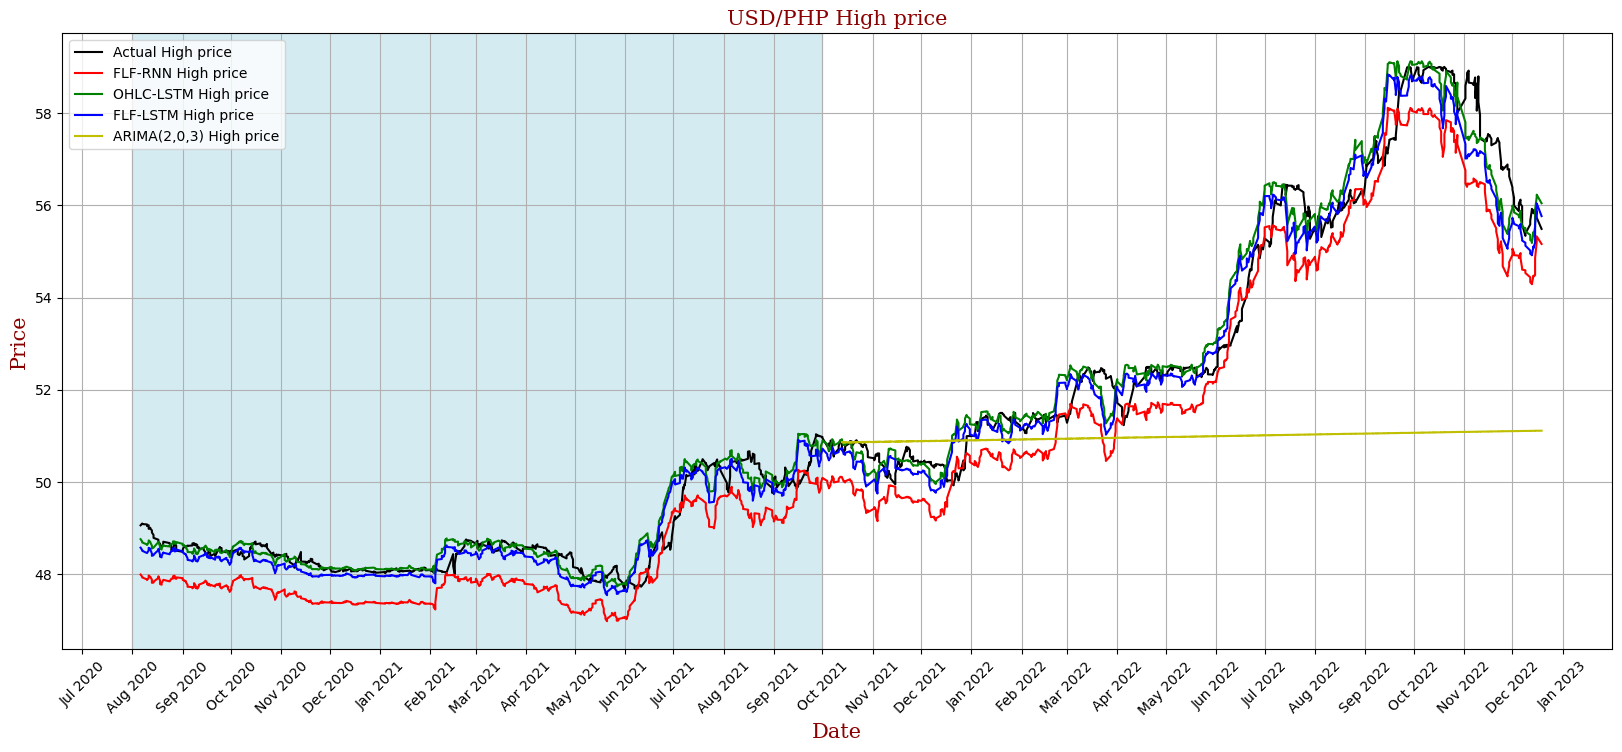

In [12]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 8))
plt.plot(date_test, grHigh,'k', label = 'Actual High price')
plt.plot(date_test,rnnHigh,'r', label = 'FLF-RNN High price')
plt.plot(date_test,OHLCHigh,'g', label = 'OHLC-LSTM High price')
plt.plot(date_test,FLFHigh,'b', label = 'FLF-LSTM High price')
plt.plot(dt_sliced, ARIMAHigh, 'y', label='ARIMA(2,0,3) High price')
plt.xlabel('Date',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('USD/PHP High price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
# Highlight the period from August 2020 to October 2021
highlight_start = 'Aug 2020'
highlight_end = 'Oct 2021'
highlight_color = 'lightblue'
plt.axvspan(datetime.strptime(highlight_start, '%b %Y'), datetime.strptime(highlight_end, '%b %Y'), color=highlight_color, alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

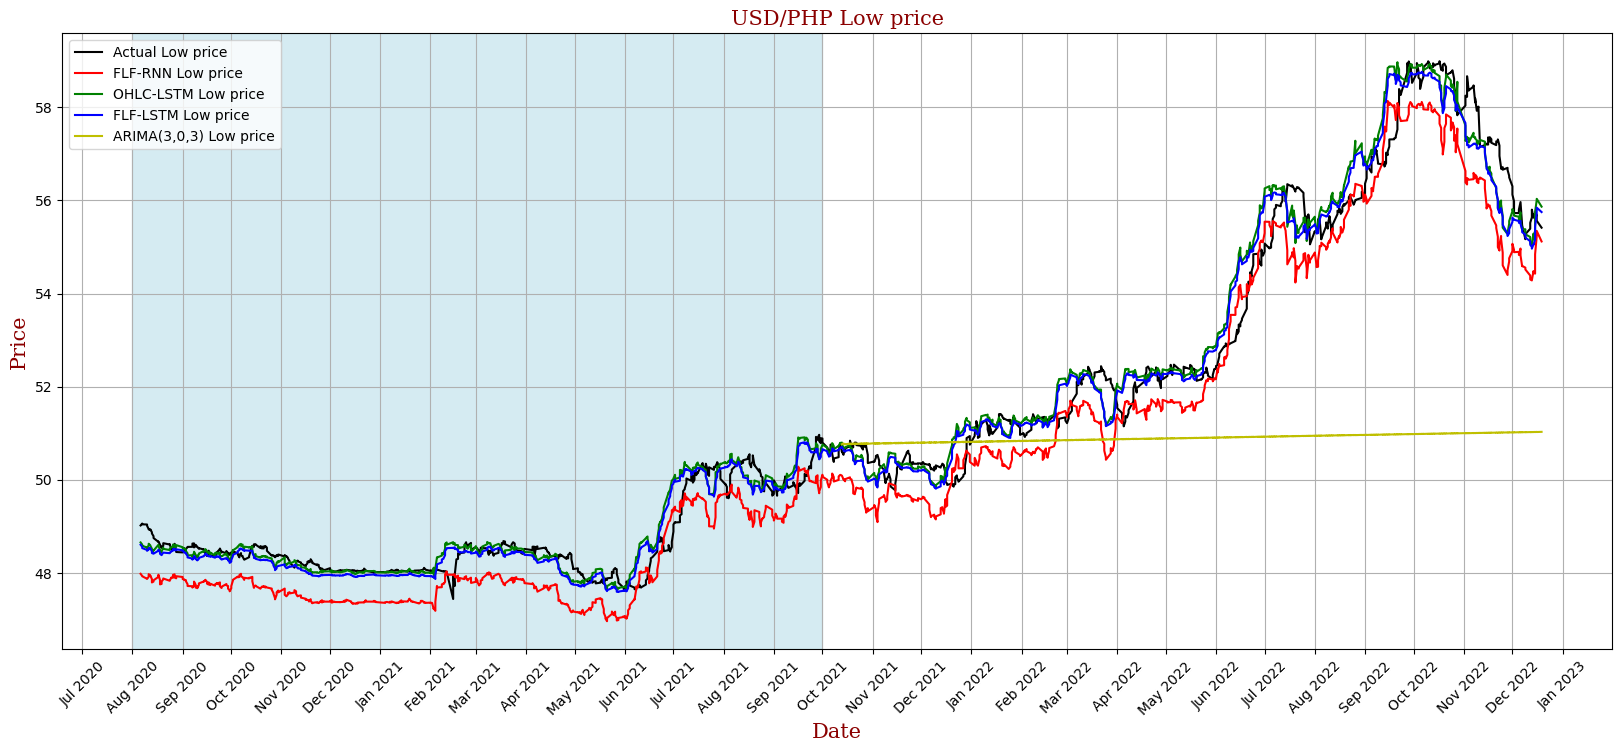

In [13]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 8))
plt.plot(date_test, grLow,'k', label = 'Actual Low price')
plt.plot(date_test,rnnLow,'r', label = 'FLF-RNN Low price')
plt.plot(date_test,OHLCLow,'g', label = 'OHLC-LSTM Low price')
plt.plot(date_test,FLFLow,'b', label = 'FLF-LSTM Low price')
plt.plot(dt_sliced, ARIMALow, 'y', label='ARIMA(3,0,3) Low price')
plt.xlabel('Date',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('USD/PHP Low price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
# Highlight the period from August 2020 to October 2021
highlight_start = 'Aug 2020'
highlight_end = 'Oct 2021'
highlight_color = 'lightblue'
plt.axvspan(datetime.strptime(highlight_start, '%b %Y'), datetime.strptime(highlight_end, '%b %Y'), color=highlight_color, alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

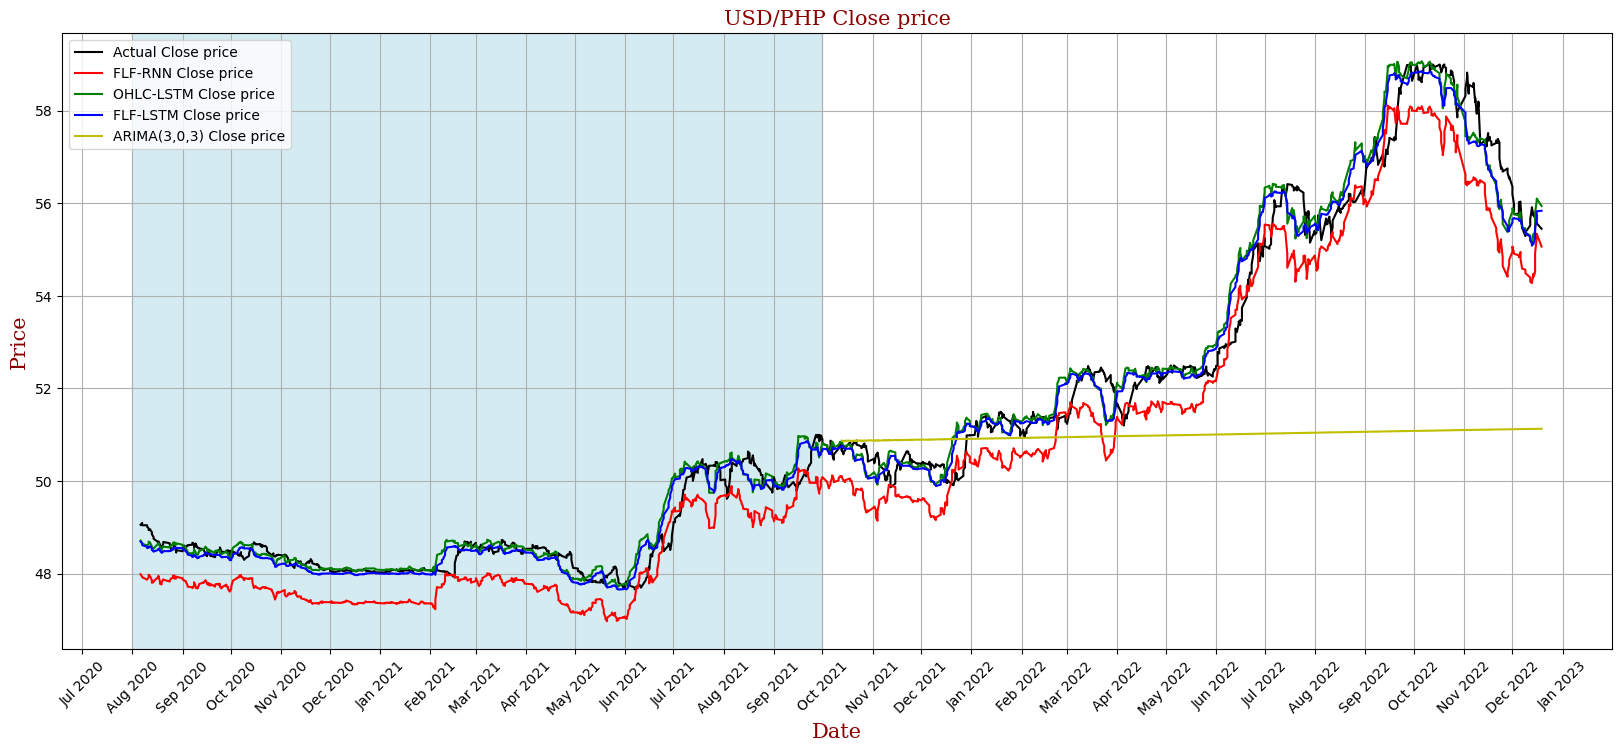

In [14]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,8 ))
plt.plot(date_test, grClose,'k', label = 'Actual Close price')
plt.plot(date_test,rnnClose,'r', label = 'FLF-RNN Close price')
plt.plot(date_test,OHLCClose,'g', label = 'OHLC-LSTM Close price')
plt.plot(date_test,FLFClose,'b', label = 'FLF-LSTM Close price')
plt.plot(dt_sliced, ARIMAClose, 'y', label='ARIMA(3,0,3) Close price')
plt.xlabel('Date',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.title('USD/PHP Close price',fontdict=font)
plt.grid(True)
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)
# Highlight the period from August 2020 to October 2021
highlight_start = 'Aug 2020'
highlight_end = 'Oct 2021'
highlight_color = 'lightblue'
plt.axvspan(datetime.strptime(highlight_start, '%b %Y'), datetime.strptime(highlight_end, '%b %Y'), color=highlight_color, alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()